In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 


# Exploration des données

In [5]:

df = pd.read_csv('data/marketing_campaign.csv', sep='\t')


Suppression des NA 

In [53]:
na_counts = df.isna().sum()
df=df.dropna()


In [59]:
unique_counts = df.nunique()
colonnes_a_supprimer = ['ID', 'Z_CostContact','Z_Revenue', 'Complain']
df = df.drop(columns=colonnes_a_supprimer)


KeyError: "['ID', 'Z_CostContact', 'Z_Revenue'] not found in axis"

In [57]:
valeurs_uniques = df.nunique()
compte_par_valeur = df.apply(lambda x: x.value_counts())

print(valeurs_uniques)
print(compte_par_valeur)

Year_Birth               46
Education                 5
Marital_Status            5
Income                 1854
Kidhome                   3
Teenhome                  3
Dt_Customer             655
Recency                 100
MntWines                743
MntFruits               156
MntMeatProducts         529
MntFishProducts         180
MntSweetProducts        172
MntGoldProds            209
NumDealsPurchases        15
NumWebPurchases          14
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
Total_Mnt               989
Education_Num             5
Age_Group                 5
dtype: int64
          Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
0                NaN        NaN             NaN     NaN   1165.0    1068.0   
1                Na

In [67]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Définir la date de référence
date_reference = pd.to_datetime('2017-01-01')

# Calculer la différence en jours par rapport à la date de référence
df['Days_From_Reference'] = (df['Dt_Customer'] - date_reference).dt.days

In [58]:
distribution_par_valeur = {col: df[col].value_counts(dropna=False) for col in df.columns}

for col, dist in distribution_par_valeur.items():
    print(f"Distribution pour {col}:\n{dist}\n")

Distribution pour Year_Birth:
1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1969    70
1973    70
1974    69
1956    55
1979    53
1958    52
1952    52
1977    52
1968    51
1959    50
1966    50
1960    49
1954    49
1955    48
1982    44
1967    44
1963    44
1962    44
1951    42
1983    41
1986    41
1964    41
1957    40
1980    39
1981    38
1984    38
1953    35
1961    35
1985    32
1988    29
1989    29
1987    27
1990    18
1991    15
1992    13
1995     5
1993     4
1994     3
1996     2
Name: Year_Birth, dtype: int64

Distribution pour Education:
Graduation    1076
PhD            414
Master         336
2n Cycle       195
Basic           53
Name: Education, dtype: int64

Distribution pour Marital_Status:
Married     810
Together    530
Single      458
Divorced    220
Widow        56
Name: Marital_Status, dtype: int64

Distribution pour Income:
7500.0     12
35860.0     4
80134.0     3
47025.0     3
34176.0     3
           ..
30467.0     1
362

# Transformation des données 

## Transformer le niveau de diplôme en valeur numérique 

In [18]:
unique_values = df['Education'].unique()
mapping = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}
df['Education_Num'] = df['Education'].replace(mapping)


## Nettoyage Statut Marital

In [25]:
counts = df['Marital_Status'].value_counts()
# Convertir "Alone" en "Single"
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')

# Supprimer les lignes avec "Absurd" et "YOLO"
df = df[~df['Marital_Status'].isin(['Absurd', 'YOLO'])]
counts

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

## Nettoyage Age 

In [50]:
df.sort_values(by='Year_Birth')
df = df[df['Year_Birth'] >= 1930]

# Data Visualisation

## Profil des clients 

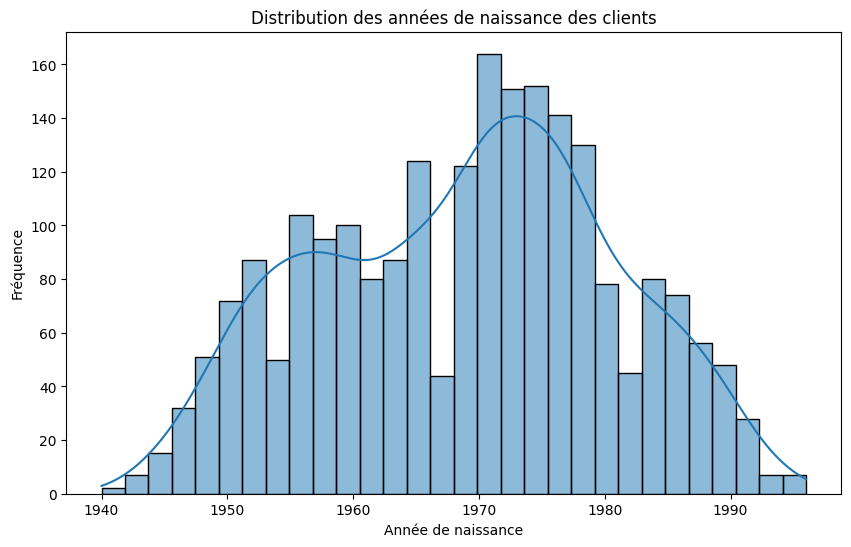

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Year_Birth'], bins=30, kde=True)
plt.title('Distribution des années de naissance des clients')
plt.xlabel('Année de naissance')
plt.ylabel('Fréquence')
plt.show()


In [14]:
df['Total_Mnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

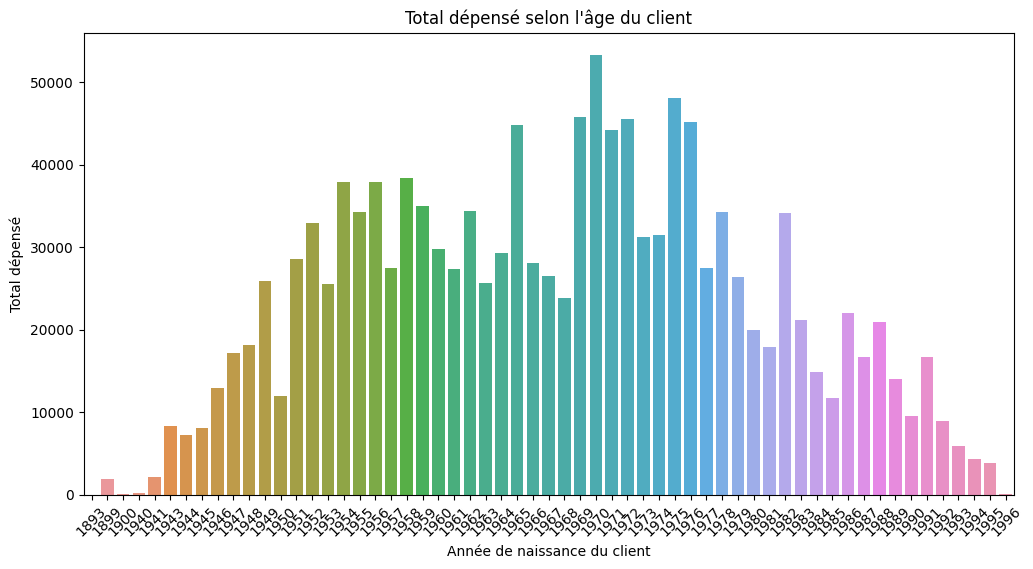

In [22]:
total_spent_by_age = df.groupby('Year_Birth')['Total_Mnt'].sum().reset_index()

# Afficher le total dépensé par âge avec Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Year_Birth', y='Total_Mnt', data=total_spent_by_age)
plt.title("Total dépensé selon l'âge du client")
plt.xlabel('Année de naissance du client')
plt.ylabel('Total dépensé')
plt.xticks(rotation=45)
plt.show()

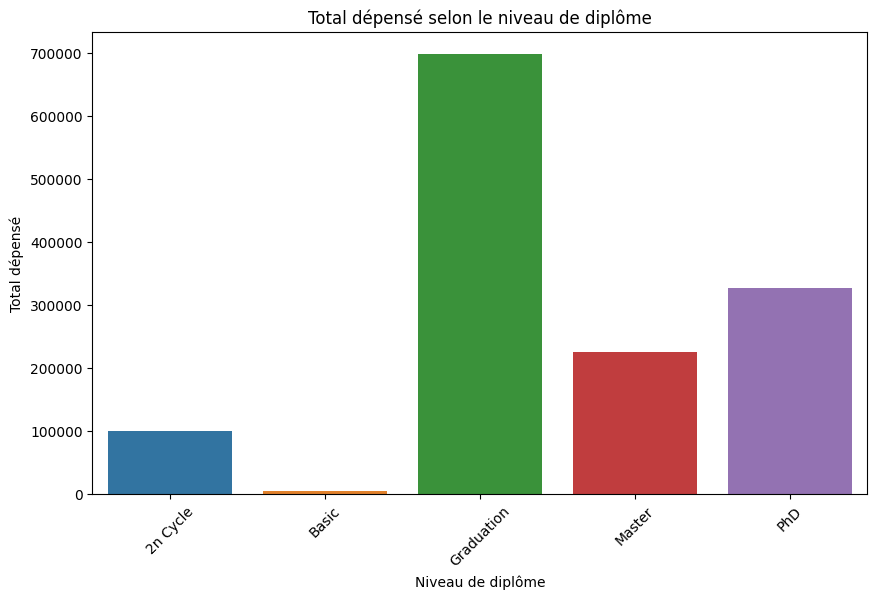

In [23]:
total_spent_by_education = df.groupby('Education')['Total_Mnt'].sum().reset_index()

# Afficher le total dépensé par niveau de diplôme avec Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Total_Mnt', data=total_spent_by_education)
plt.title("Total dépensé selon le niveau de diplôme")
plt.xlabel('Niveau de diplôme')
plt.ylabel('Total dépensé')
plt.xticks(rotation=45)
plt.show()

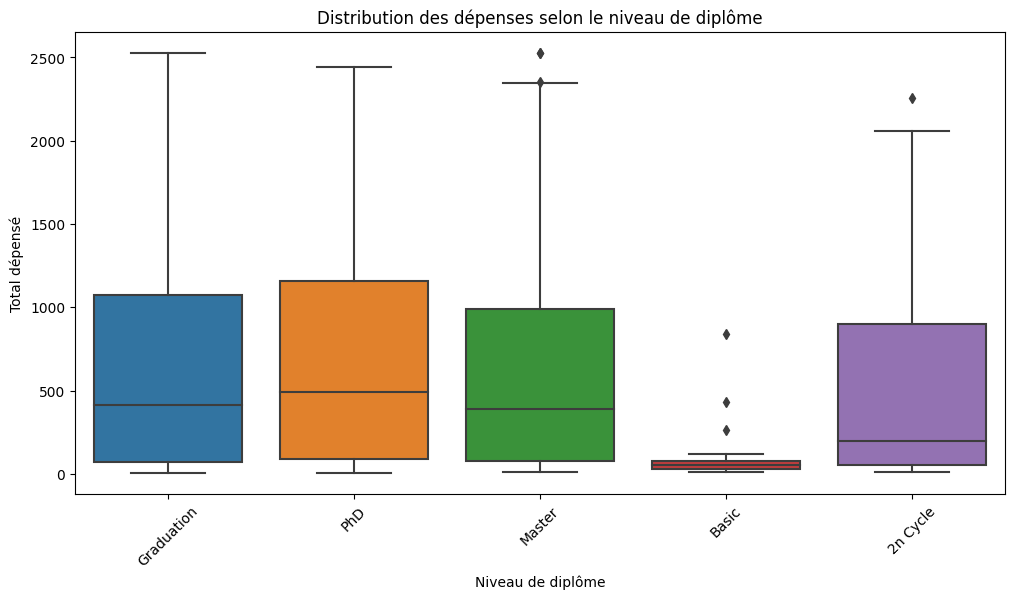

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education', y='Total_Mnt', data=df)
plt.title("Distribution des dépenses selon le niveau de diplôme")
plt.xlabel('Niveau de diplôme')
plt.ylabel('Total dépensé')
plt.xticks(rotation=45)
plt.show()

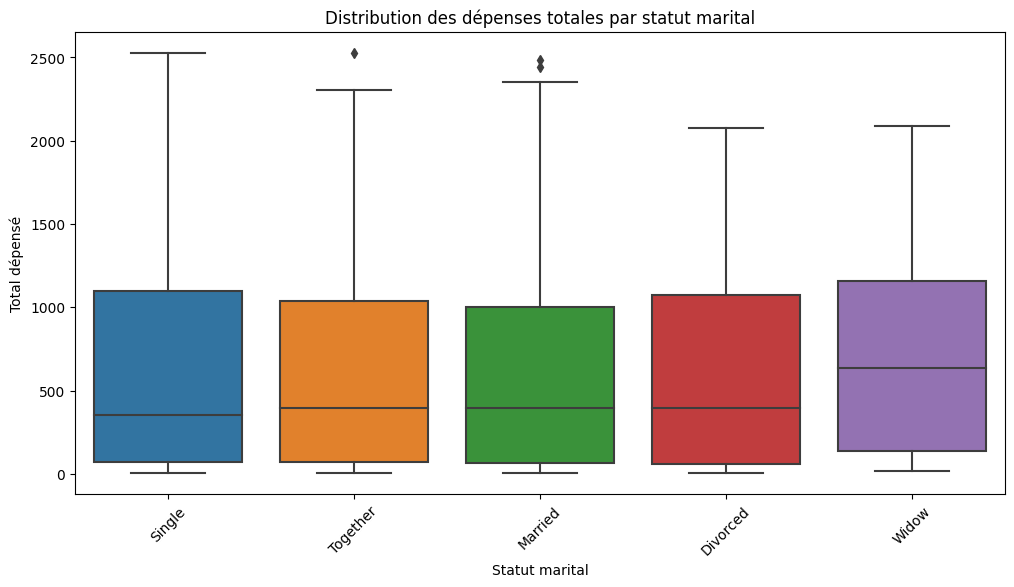

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Marital_Status', y='Total_Mnt', data=df)
plt.title("Distribution des dépenses totales par statut marital")
plt.xlabel('Statut marital')
plt.ylabel('Total dépensé')
plt.xticks(rotation=45)
plt.show()

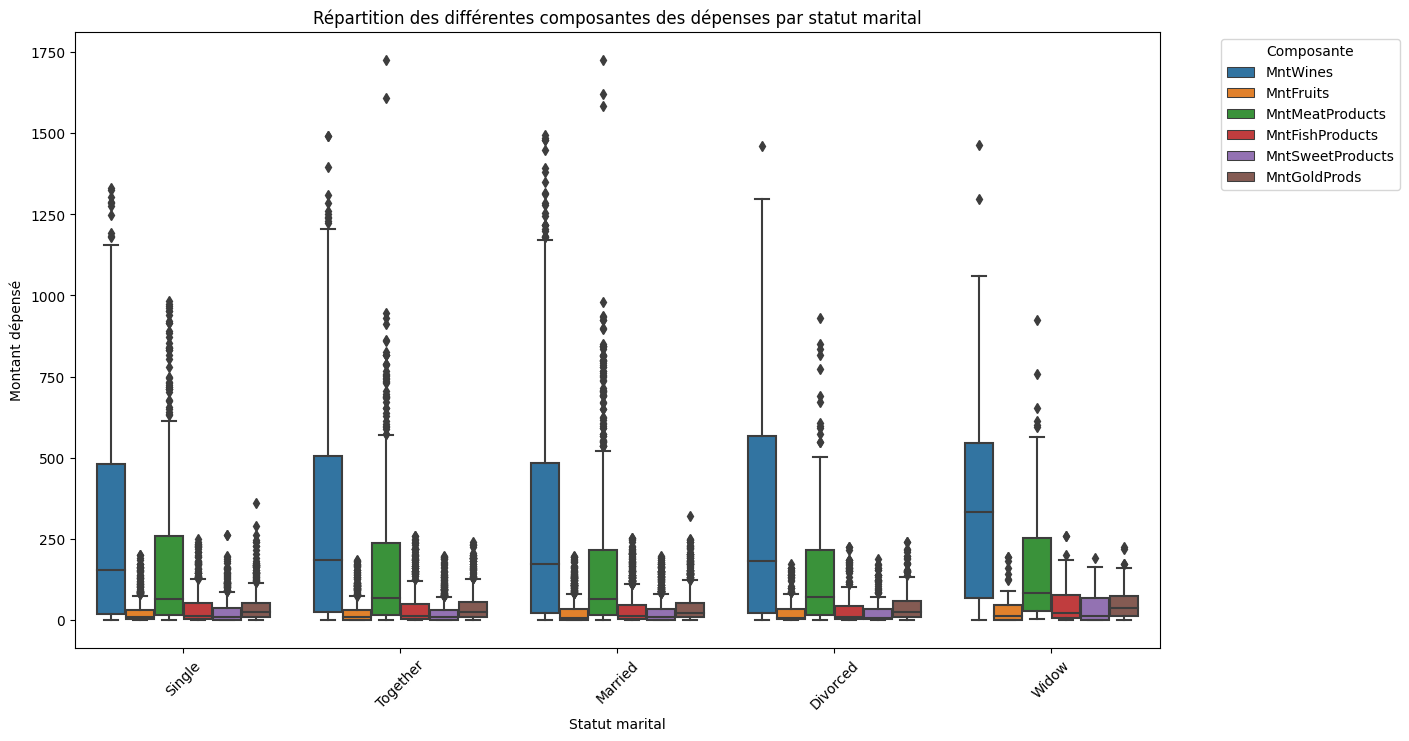

In [28]:
composantes = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Réorganiser les données pour Seaborn
df_melted = df.melt(id_vars=['ID', 'Marital_Status'], value_vars=composantes, var_name='Composante', value_name='Montant')

# Afficher la répartition des dépenses par composante et statut marital avec Seaborn (Box Plot)
plt.figure(figsize=(14, 8))
sns.boxplot(x='Marital_Status', y='Montant', hue='Composante', data=df_melted)
plt.title("Répartition des différentes composantes des dépenses par statut marital")
plt.xlabel('Statut marital')
plt.ylabel('Montant dépensé')
plt.xticks(rotation=45)
plt.legend(title='Composante', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/ipykernel_5961/2271498828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = pd.cut(df['Year_Birth'], bins=bins, labels=['50s','60s','70s', '80s', '90s'])


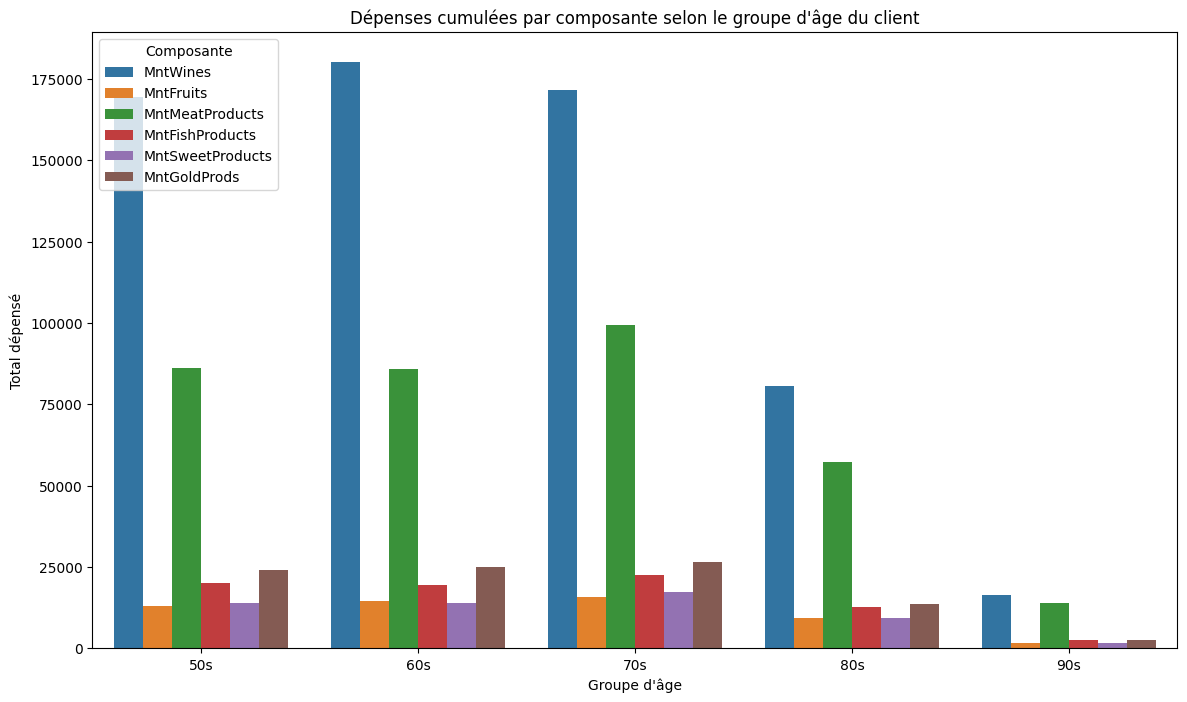

In [47]:
bins = [ 1950, 1960, 1970, 1980, 1990, 2000]

# Assigner chaque année de naissance à un bin
df['Age_Group'] = pd.cut(df['Year_Birth'], bins=bins, labels=['50s','60s','70s', '80s', '90s'])
grouped = df_melted.groupby(['Age_Group', 'Composante'])['Montant'].sum().reset_index()
totals = grouped.groupby('Age_Group')['Montant'].transform('sum')
grouped['Percentage'] = (grouped['Montant'] / totals) * 100

# Créer un graphique à barres cumulées avec Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='Age_Group', y='Montant', hue='Composante', data=df_melted, estimator=sum, ci=None)
plt.title("Dépenses cumulées par composante selon le groupe d'âge du client")
plt.xlabel('Groupe d\'âge')
plt.ylabel('Total dépensé')
plt.legend(title='Composante', loc='upper left')

# Ajouter les pourcentages au-dessus des barres

plt.show()

In [60]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Total_Mnt', 'Education_Num',
       'Age_Group'],
      dtype='object')

In [61]:
education_distribution = df['Education'].value_counts()
print(education_distribution)

Graduation    1076
PhD            414
Master         336
2n Cycle       195
Basic           53
Name: Education, dtype: int64


In [68]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Mnt,Education_Num,Age_Group,Days_From_Reference
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,1,1617,3,50s,-1728
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,0,27,3,50s,-882
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,776,3,60s,-1229
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,0,53,3,80s,-822
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,422,5,80s,-1078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,1974,Graduation,Married,34421.0,1,0,2013-01-07,81,3,3,...,0,0,0,0,0,0,30,3,70s,-1455
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,0,1341,3,60s,-1298
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,1,0,0,0,0,0,1241,3,80s,-1072
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,0,843,4,50s,-1073
